<a href="https://colab.research.google.com/github/nithu1231/bharath/blob/main/sms_classificattion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science intern @BharatIntern
**Task-1 ----SMS Classifier**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib  inline
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
ps=PorterStemmer()
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
swords=stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
sms=pd.read_csv(r"/content/spam.csv", encoding='latin-1')

In [3]:
sms=sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [4]:
sms

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
sms=sms.replace(['ham','spam'],[0, 1])

In [6]:
sms.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
sms.tail()

,v1,v2
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [8]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [9]:
sms.describe()

,v1
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
sms.shape

(5572, 2)

In [11]:
len(sms)

5572

In [12]:
sms.columns

Index(['v1', 'v2'], dtype='object')

In [13]:
sms.nunique()

,0
v1,2
v2,5169


In [14]:
sent="Hello,how are you?"

In [15]:
def clean_text(sent):
  tokens=word_tokenize(sent)
  clean=[word for word in tokens
         if word.isdigit()or word.isalpha()]
  clean=[ps.stem(word)for word in clean
         if word not in swords]
  return(clean)
clean_text(sent)

['hello']

In [16]:
tfidf=TfidfVectorizer(analyzer=clean_text)

In [17]:
x=sms['v2']
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object


In [18]:
y=sms['v1']
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64


In [19]:
x_new=tfidf.fit_transform(x)

In [20]:
print(x.shape)

(5572,)


In [22]:
print(x_new.shape)

(5572, 6450)


In [23]:
y.value_counts()

,count
v1,
0,4825
1,747


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=0)

In [25]:
x_train.shape

(4179, 6450)

In [26]:
x_test.shape

(1393, 6450)

#***Naive bayes Algorithm***

In [27]:
nb=MultinomialNB()

In [28]:
!pip install scipy
from scipy.sparse import csr_matrix
nb = MultinomialNB()
if isinstance(x_train, csr_matrix):
    x_train_dense = x_train.toarray()
    nb.fit(x_train_dense, y_train)
else:
    nb.fit(x_train, y_train)

In [30]:
y_pred=nb.predict(x_test.toarray())

In [31]:
y_test.value_counts()

,count
v1,
0,1196
1,197


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1196
           1       0.99      0.67      0.80       197

    accuracy                           0.95      1393
   macro avg       0.97      0.83      0.89      1393
weighted avg       0.95      0.95      0.95      1393



In [33]:
accuracy_score(y_test,y_pred)

0.9526202440775305

##**Random Forest Algorithm**

In [34]:
rf=RandomForestClassifier(random_state=0)

In [35]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

*In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.*

In [36]:
y_pred=rf.predict(x_test)

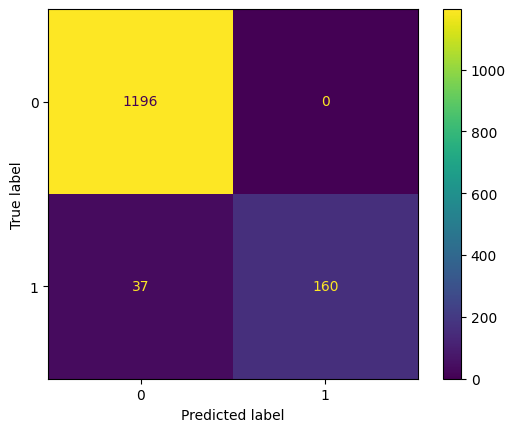

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [38]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1196
           1       1.00      0.81      0.90       197

    accuracy                           0.97      1393
   macro avg       0.98      0.91      0.94      1393
weighted avg       0.97      0.97      0.97      1393



In [39]:
accuracy_score(y_test,y_pred)

0.9734386216798278

##**Logistic Regression**

In [40]:
log=LogisticRegression()

In [41]:
log.fit(x_train,y_train)

LogisticRegression()

*In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org*

In [42]:
y_pred  = log.predict(x_test)

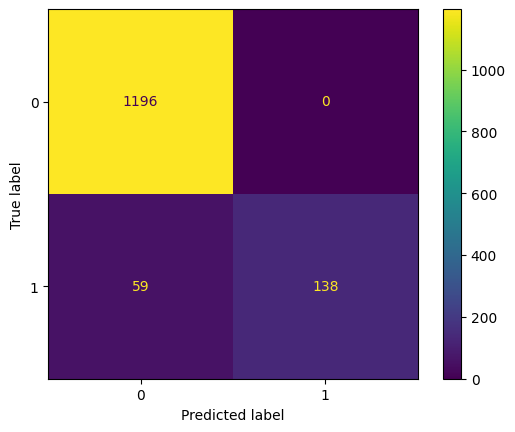

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1196
           1       1.00      0.70      0.82       197

    accuracy                           0.96      1393
   macro avg       0.98      0.85      0.90      1393
weighted avg       0.96      0.96      0.95      1393



In [45]:
accuracy_score(y_test,y_pred)

0.9576453697056713

##**he best model predicted is Random Forest Algorithm with high accuracy -97.34%**